#### HR Analytics Project- Understanding the Attrition in HR
#### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

##### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

##### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

##### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [2]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score



In [3]:
# READING THE DATASET
df=pd.read_csv(r"C:\Users\HP\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- As we can see the given dataset is about Attrition in human resources in a company. There are some independendent variables are provided depending upon which we need to predict Attrition in an organization. As Attrition is a categorical class, it is a classification type of problem.

In [4]:
df.shape

(1470, 35)

- There are 1470 rows and 35 columns in this dataset.

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- There are 35 types of columns, 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'. Out of which Attrition column is the dependent variable and rest of the columns are the features.

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There is no missing value present in the dataset.

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- No missing value is present in any column as all the columns are having 1470 value.
- There are 9 columns which are in Object data type like Attrition (target variable),BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime. And rest of the columns are having discrete values (integer value). 

In [360]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- As we have already seen there are 9 columns are having object data type,  Attrition (target variable),BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime and rest of the 26 columns are having discrete values like,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,     JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.


Let's check the Statistics:

In [361]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- There is no missing value present in the dataset as count of each column is 1470 .
- Minimum Age is 18, maximum age is 60(maybe because it's the retirement age) and average age is 36.
- 'EmployeeCount','Over18','StandardHours' have only one value, maybe we will drop these later.
- Most of the columns are having discrete values.


#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:

#### Univariate Analysis:

No     1233
Yes     237
Name: Attrition, dtype: int64

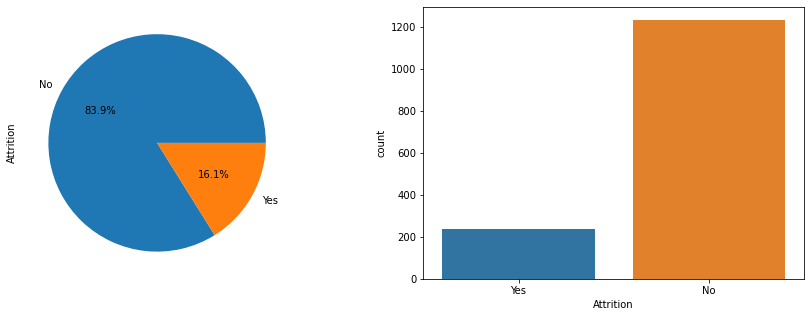

In [362]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Attrition'])
df['Attrition'].value_counts()

- As we can see 16.1%(237) of people is doing attrition other than that 83.9%(1233) people do not do attrition as the data.
- The target variable is imbalanced hence we need to balance the data before model creation.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

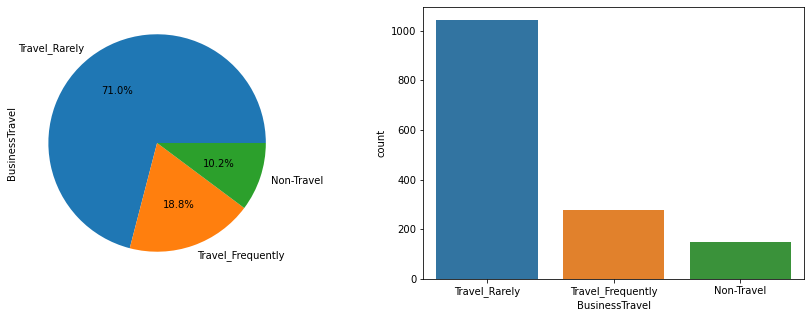

In [363]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['BusinessTravel'])
df['BusinessTravel'].value_counts()

- There are 3 categories in BusinessTravel column. And those columns are having different count of values like Travel_Rarely - 1043,Travel_Frequently - 277,Non-Travel - 150. Hence, 71% employees are Travel ralely, 18.8% employees are Travel Frequently and 10.2% employees are non travellers.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

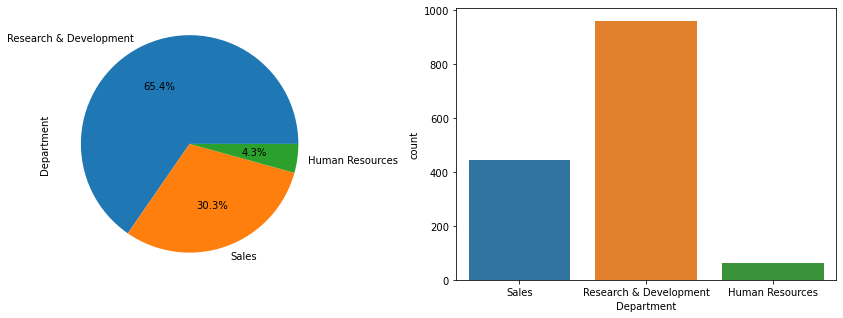

In [364]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Department'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Department'])
df['Department'].value_counts()

- As we can see there are 3 Departments. Out of which Research & Development is having 961 employees(65.4%), Sales department is having 446 employees (30.3%) and Human Resources is having 63 employees(4.3%).

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

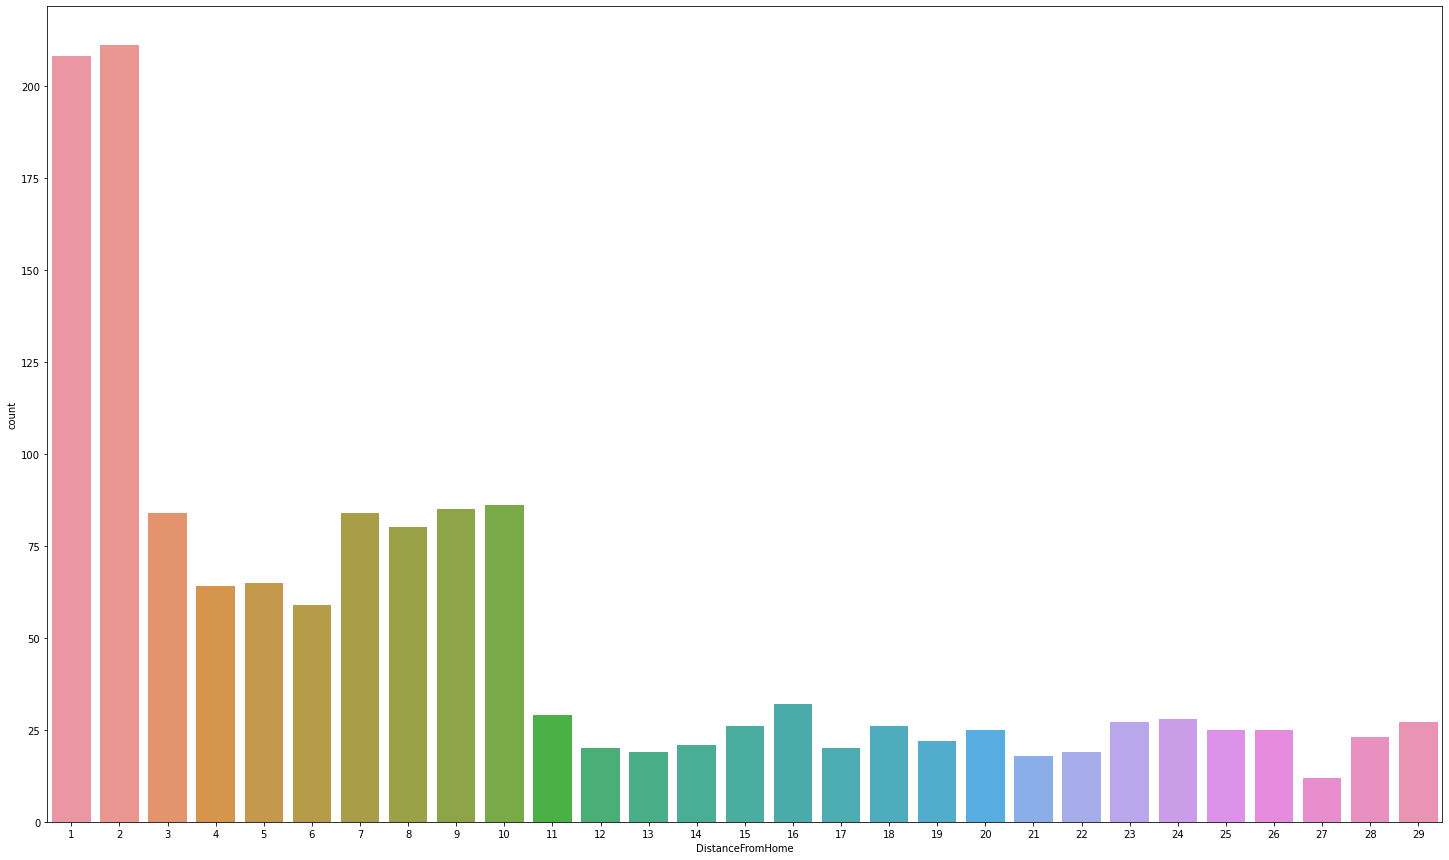

In [365]:
plt.figure(figsize=(25,15))
sns.countplot(df['DistanceFromHome'])
df['DistanceFromHome'].value_counts()

- As we can see, in DistanceFromHome column the categories 2 and 1 is having highest frequencies(more than 200).

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

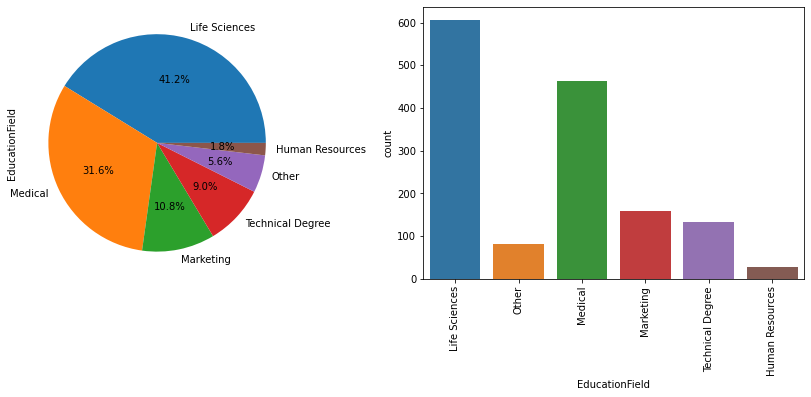

In [366]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['EducationField'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['EducationField'])
plt.xticks(rotation=90)
df['EducationField'].value_counts()

- Employees are coming from 6 different educational Fields. Most of the employees are coming from Life Sciences i.e 606 counts (41.2%), 2nd highest category is the Medical employees that counts 464 (31.6%)and Marketing employees are 159 in counts(10.8%),Technical degree employees are 132 in counts(9%) , The other categories are 82 in counts(5.6%) and Human Resources employees are 27 in counts(1.8%).

Male      882
Female    588
Name: Gender, dtype: int64

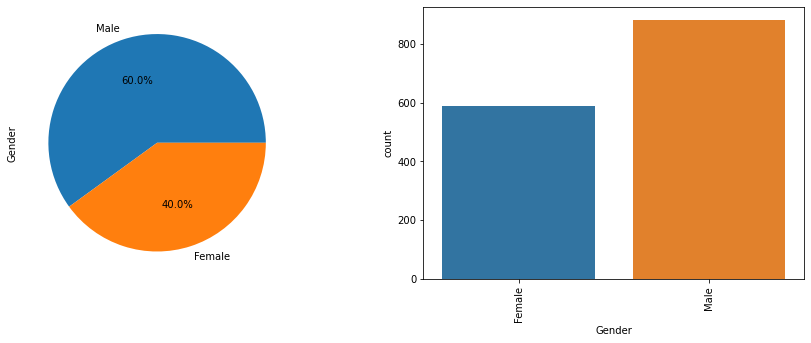

In [367]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Gender'])
plt.xticks(rotation=90)
df['Gender'].value_counts()

- There are 882 employees are the male(60%) and 588 employees are female(40%).

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

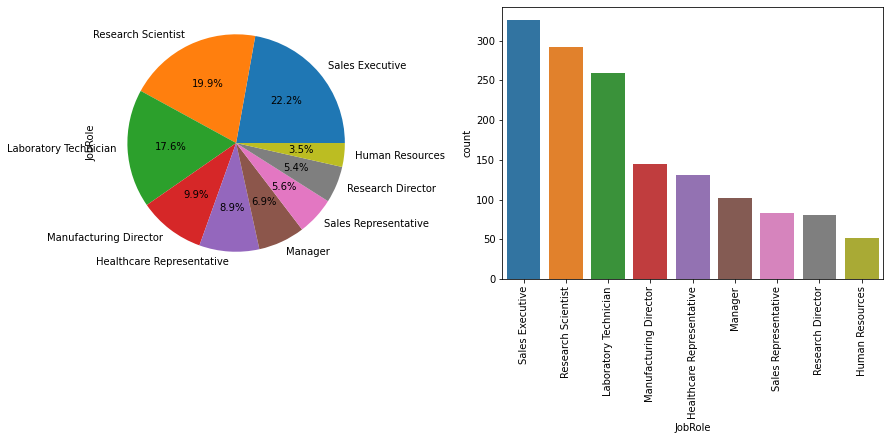

In [368]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['JobRole'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['JobRole'])
plt.xticks(rotation=90)
df['JobRole'].value_counts()

- There are 9 categories in jobrole column. Where Sales executive employees has the highest count 326(22.2%)regarding jobrole, then 2nd highest is Research Scientst jobrole it counts 292(19.9%) and lowest count of jobrole is Human Resources, it counts 52 (3.5%).

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

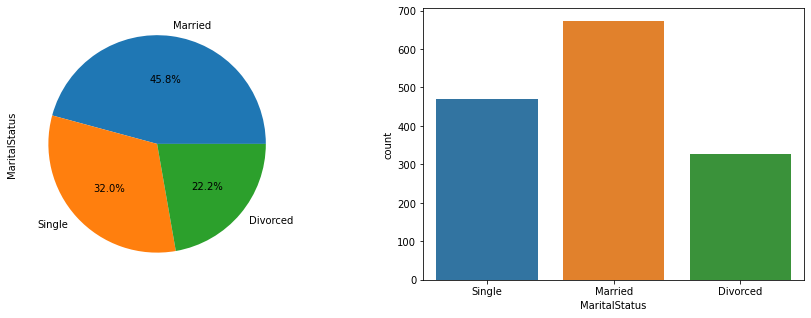

In [369]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['MaritalStatus'])
df['MaritalStatus'].value_counts()

- Most of the employees are Married(45.8%) in the organization, 32% employees are single and 22.2% employees are Divorced.

Y    1470
Name: Over18, dtype: int64

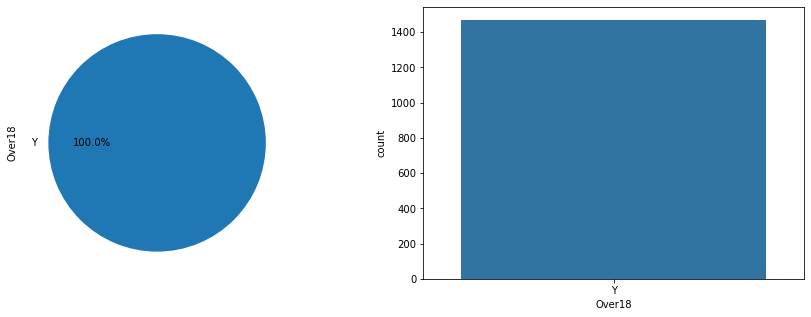

In [370]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Over18'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Over18'])
df['Over18'].value_counts()

- All the employees are above 18 years and as this column is not carring any other important information hence we can drop it during data cleaning.

No     1054
Yes     416
Name: OverTime, dtype: int64

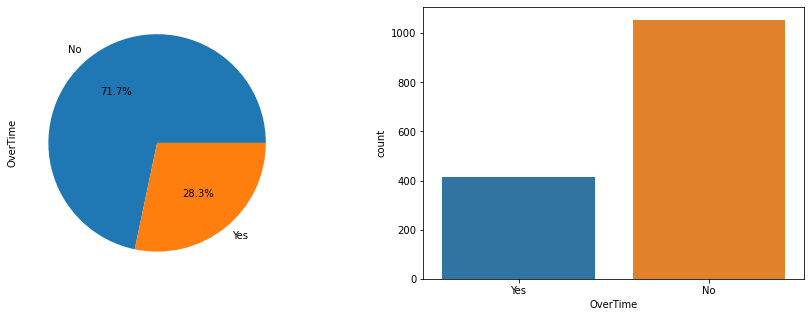

In [371]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['OverTime'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['OverTime'])
df['OverTime'].value_counts()

- 1054 number of employees are not interested in pursuing overtime(71.7%) whereas 416 number of employees are interested in doing overtime(28.3%).

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

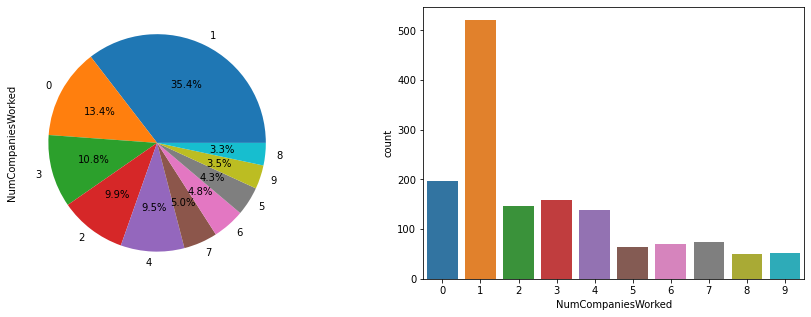

In [372]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['NumCompaniesWorked'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['NumCompaniesWorked'])
df['NumCompaniesWorked'].value_counts()

- Mostly employees are worked in one company (35.4%). Employee counts is 521. And only 49 employees (3.3%) have worked in 8 companies.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

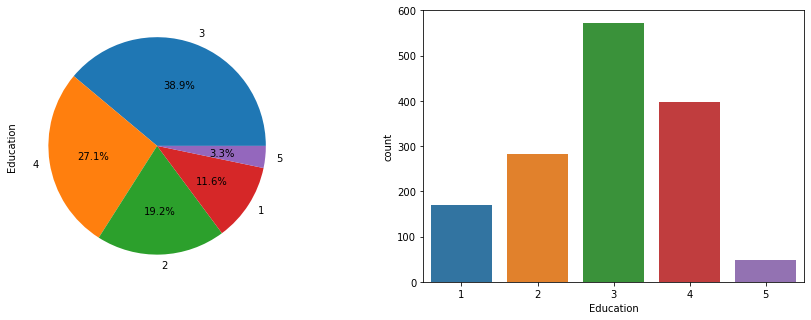

In [373]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Education'])
df['Education'].value_counts()

- In Education column there are 5 categories. Highest 38.9% of employees are from category 3(572 counts) and lowest 3.3% of employees are from category 5(counts 48).

1    1470
Name: EmployeeCount, dtype: int64

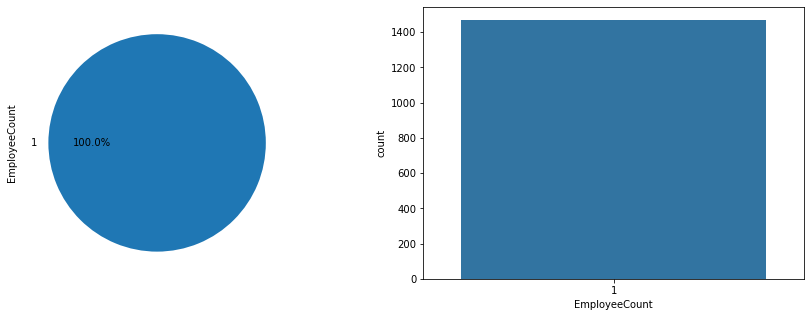

In [374]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['EmployeeCount'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['EmployeeCount'])
df['EmployeeCount'].value_counts()

- As we can see the Employee count column has only one category hence we will drop this column before model creation.

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

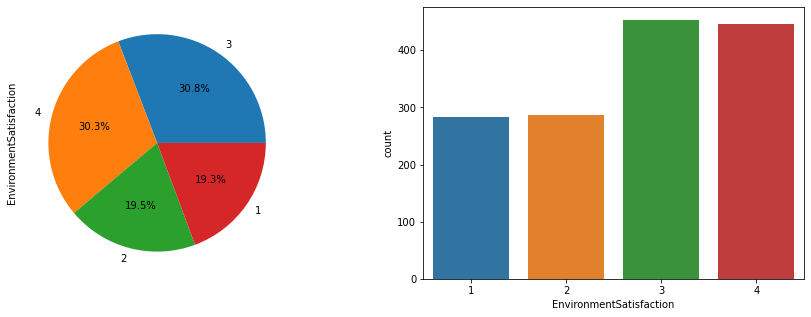

In [375]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['EnvironmentSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['EnvironmentSatisfaction'])
df['EnvironmentSatisfaction'].value_counts()

- There are 4 categories in environment satisfaction column out of which category 3 is having the highest count 453(30.8%), following that category 4 is having the 2nd highest count 446(30.3%) and category 1 has the least count 284(19.3%). It means most of the employees are satisfied with the Environment.

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

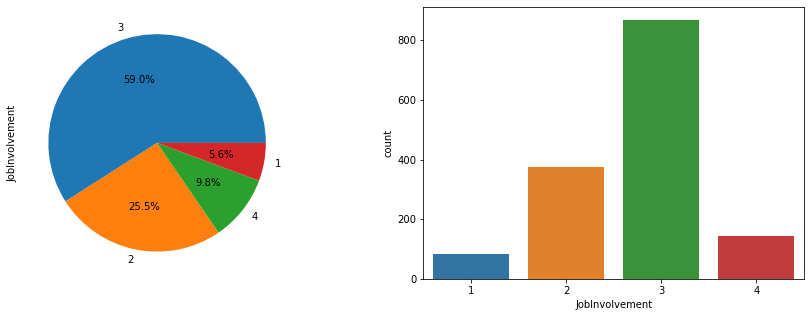

In [376]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['JobInvolvement'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['JobInvolvement'])
df['JobInvolvement'].value_counts()

- The Job Involvement column is having 4 categories. Out of which category 3 has the highest count 868(59%) and category 1 has the lowest count 83(5.6%).

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

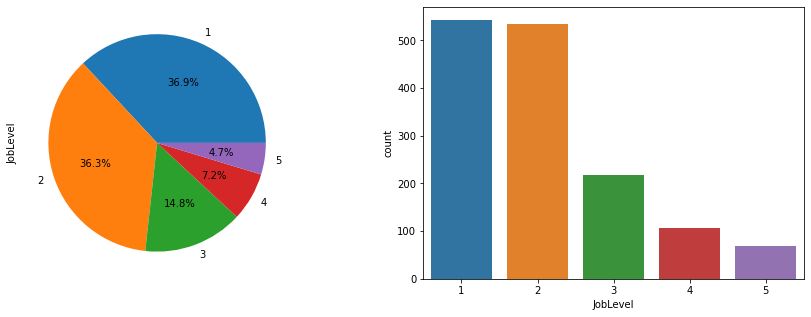

In [377]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['JobLevel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['JobLevel'])
df['JobLevel'].value_counts()

- There are 5 categories in Job Level column. Out of which category 1 has highest 543 counts(36.9%) and category 5 has the lowest count 59 counts(4.7%).

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

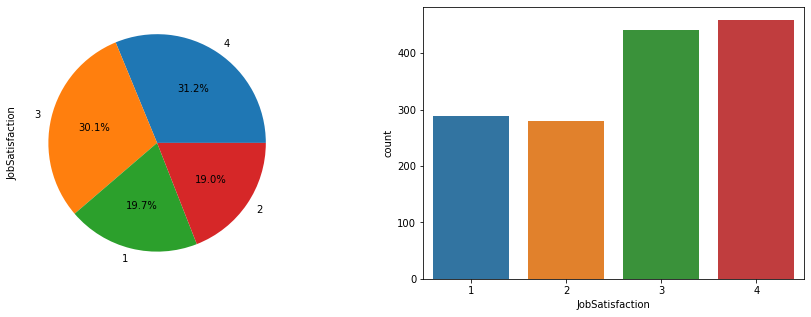

In [378]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['JobSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['JobSatisfaction'])
df['JobSatisfaction'].value_counts()

- Job Satisfaction column has 4 categories, out of which category 4 has highest counts 459(31.2%) and category 2 has least counts 280 (19%).

3    1244
4     226
Name: PerformanceRating, dtype: int64

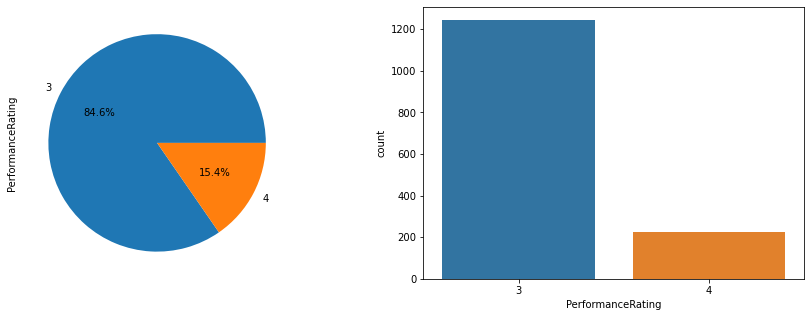

In [379]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['PerformanceRating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['PerformanceRating'])
df['PerformanceRating'].value_counts()

- In Performance Rating column there are two categories. category 3 has highest counts 1244(84.6%) and category 4 has 226 counts(15.4%).

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

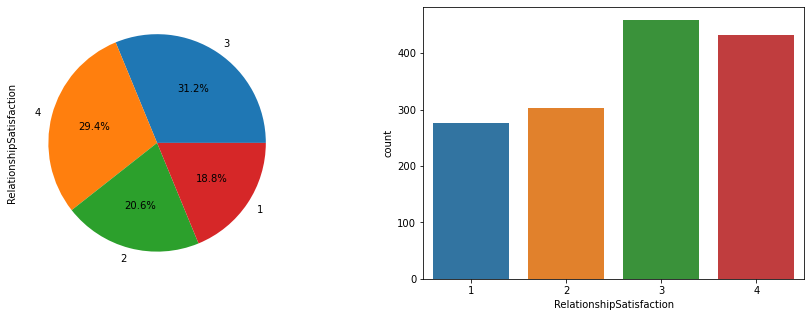

In [380]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['RelationshipSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['RelationshipSatisfaction'])
df['RelationshipSatisfaction'].value_counts()

- Relationship Satisfaction has 4 categories, out of which category 3 has highest counts 459(31.2%) and category 1 has least counts 276 (18.8%).

80    1470
Name: StandardHours, dtype: int64

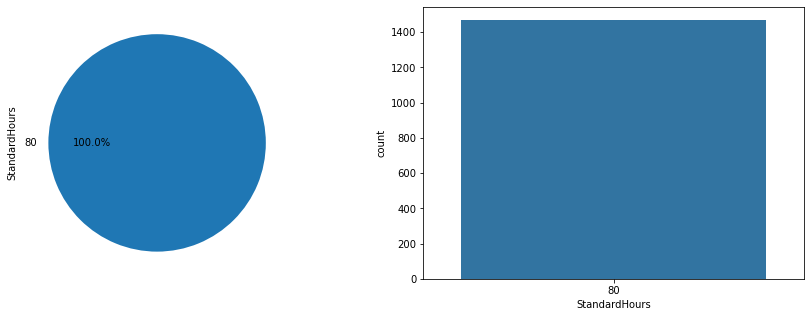

In [381]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['StandardHours'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['StandardHours'])
df['StandardHours'].value_counts()

- As we can see the StandardHours column has only one category hence we will drop this column before model creation.

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

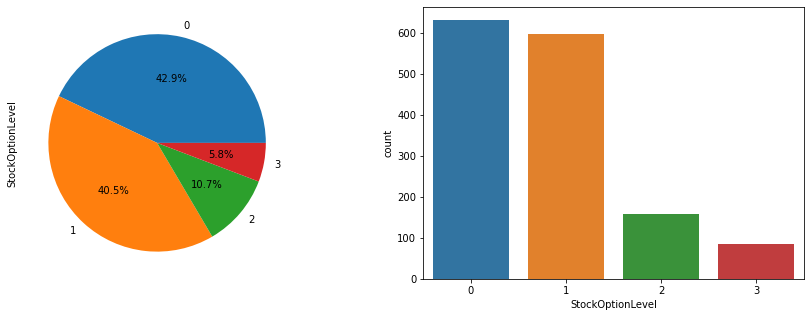

In [382]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['StockOptionLevel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['StockOptionLevel'])
df['StockOptionLevel'].value_counts()

- StockOptionLevel has 4 categories, out of which category 0 has highest counts 631(42.9%) and category 3 has least counts 85 (5.8%)

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

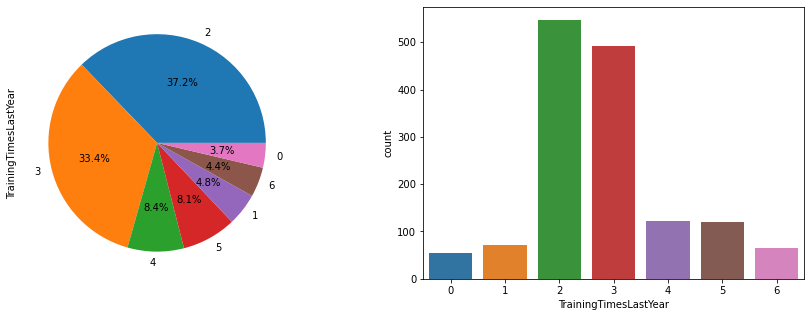

In [383]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['TrainingTimesLastYear'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['TrainingTimesLastYear'])
df['TrainingTimesLastYear'].value_counts()

- TrainingTimesLastYear has 6 categories, out of which category 2 has highest counts 547(37.2%) and category 0 has least counts 54 (3.7%)

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

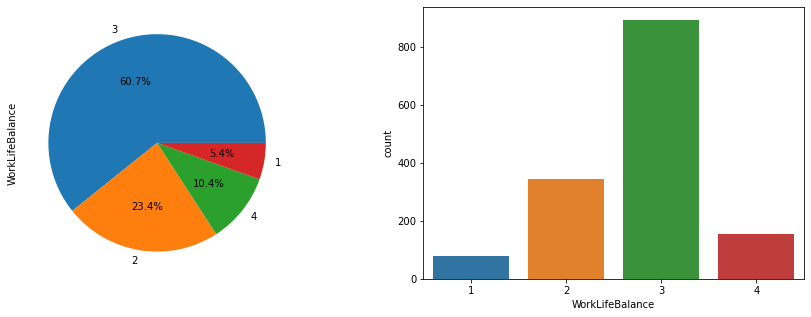

In [384]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['WorkLifeBalance'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['WorkLifeBalance'])
df['WorkLifeBalance'].value_counts()

- WorkLifeBalance has 4 categories, out of which category 3 has highest counts 893(60.7%%) and category 1 has least counts 80 (5.4%)

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

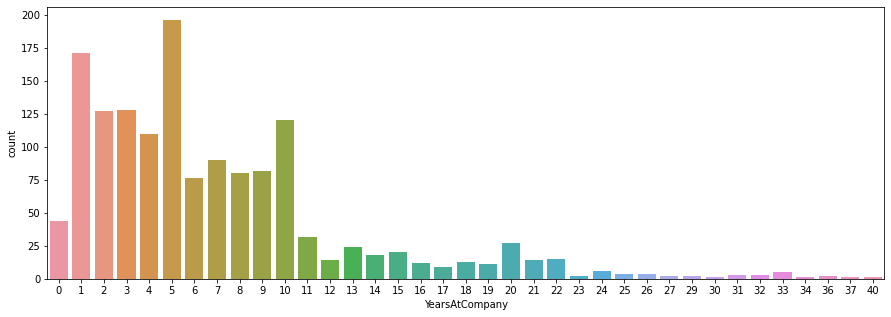

In [386]:
plt.figure(figsize=(15,5))
sns.countplot(df['YearsAtCompany'])
df['YearsAtCompany'].value_counts()

- Employees has worked for several years at the company. Mosltly 196 employees are working in the company for 5 years that is the highest frequency. And 171 employees are working at the company for 1 year only. People who are working at the company in longer period of time is less. 

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

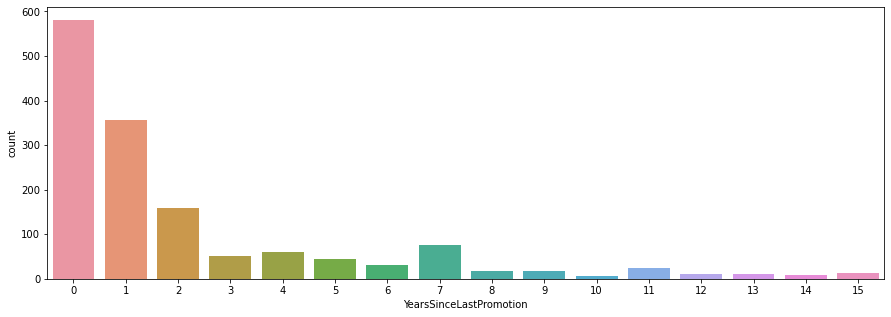

In [387]:
plt.figure(figsize=(15,5))
sns.countplot(df['YearsSinceLastPromotion'])
df['YearsSinceLastPromotion'].value_counts()

- The highest count has been seen in 581 employees who have not completed one year since last promotion.


2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

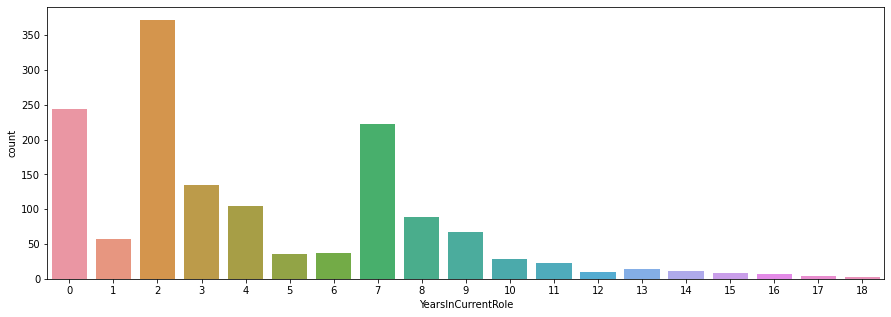

In [388]:
plt.figure(figsize=(15,5))
sns.countplot(df['YearsInCurrentRole'])
df['YearsInCurrentRole'].value_counts()

- Highest 372 employees are working for 2 years in current role. Least 2 employees are working for 18 years in current role.

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

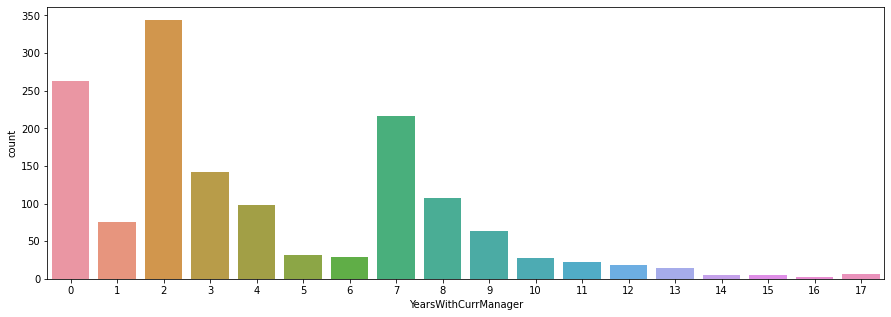

In [390]:
plt.figure(figsize=(15,5))
sns.countplot(df['YearsWithCurrManager'])
df['YearsWithCurrManager'].value_counts()

- Highest 344 employees are working with current Manager for 2 years.

Minimum 18
Maximum 60


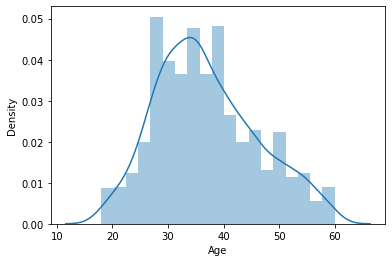

In [392]:
sns.distplot(df['Age'])
print('Minimum',df['Age'].min())
print('Maximum',df['Age'].max())

- Minimum age of an employee is 18 and maximum age of an employee is 60. And 30-40 years of age is the average in a company.

Minimum 11
Maximum 25


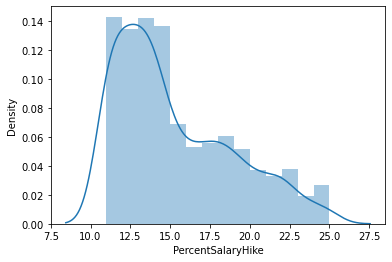

In [393]:
sns.distplot(df['PercentSalaryHike'])
print('Minimum',df['PercentSalaryHike'].min())
print('Maximum',df['PercentSalaryHike'].max())

- The minimum Percentage of salary hike is 11% whereas highest percentage of salary hike is 25%. The data is bit right skewed, we will take care during data cleaning.

Minimum 1009
Maximum 19999


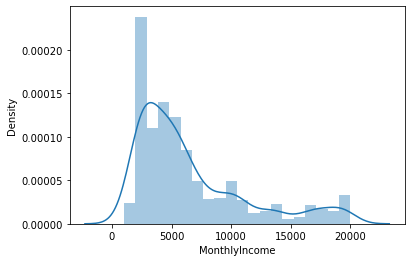

In [394]:
sns.distplot(df['MonthlyIncome'])
print('Minimum',df['MonthlyIncome'].min())
print('Maximum',df['MonthlyIncome'].max())

- Minimum Monthly income is 1009 and the maximum salary is  19999. And the data is right skewed.

Minimum 30
Maximum 100


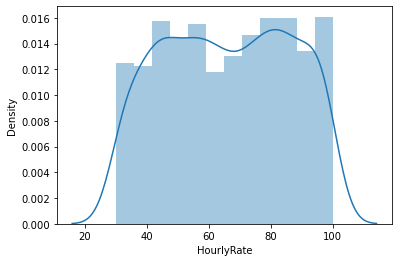

In [395]:
sns.distplot(df['HourlyRate'])
print('Minimum',df['HourlyRate'].min())
print('Maximum',df['HourlyRate'].max())

- Minimum hourly rate is 30 and Maximum hourly rate is 100.

Minimum 2094
Maximum 26999


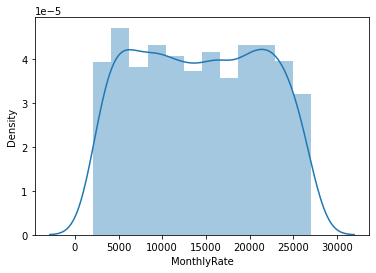

In [396]:
sns.distplot(df['MonthlyRate'])
print('Minimum',df['MonthlyRate'].min())
print('Maximum',df['MonthlyRate'].max())

- Minimum monthly rate is 2094 and Maximum monthly rate is 26999.

Minimum 0
Maximum 40


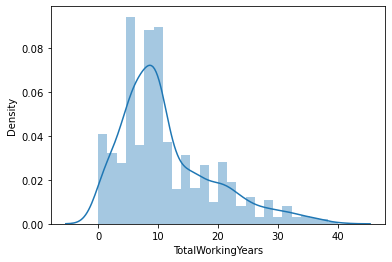

In [397]:
sns.distplot(df['TotalWorkingYears'])
print('Minimum',df['TotalWorkingYears'].min())
print('Maximum',df['TotalWorkingYears'].max())

- Highest Total Working Years rate is 40 and Minimum total working years is 0. That means Freshers are also there in the company. This data is a bit right skewed.

In [398]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

- As we can see there are skewness in the data. We will take care of those before model creation.

#### Outlier Detection:

Now let's analyze the outliers in continuous data:

In [399]:
df_features=df[['Age','DistanceFromHome','MonthlyIncome','JobLevel','PercentSalaryHike','NumCompaniesWorked',
                'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                'YearsWithCurrManager']]   # Instantiating continuous variable into a single variable

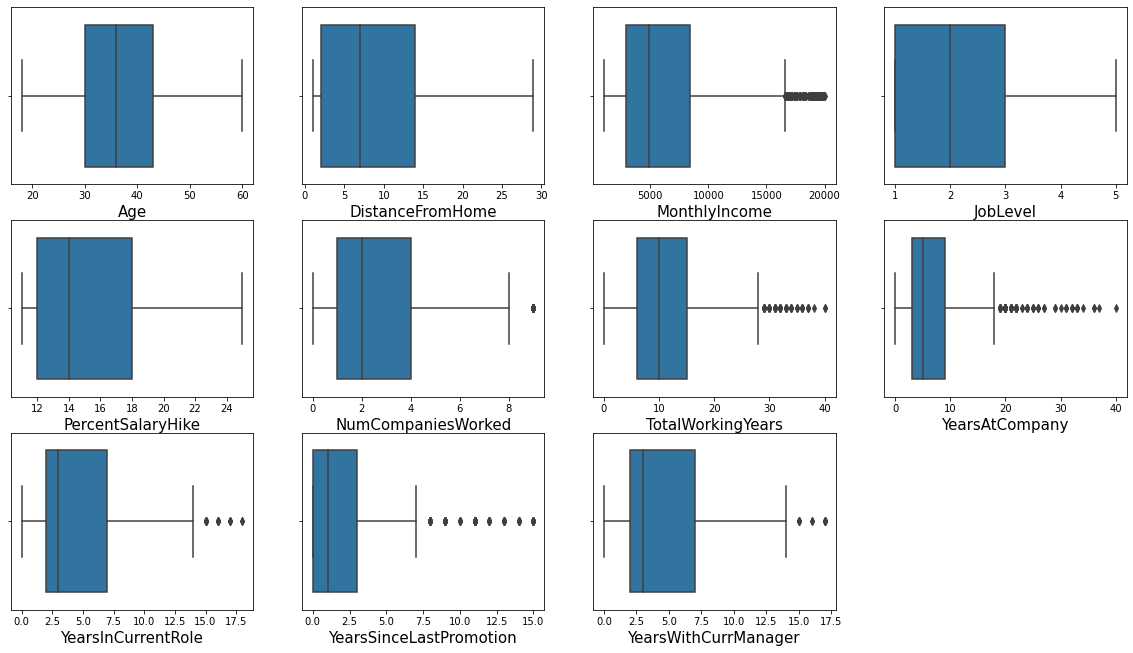

In [400]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

- As we can see there are outliers in Monthly Income, NumCompanies worked , Total Working Years, Years at Company,Years in Current Role,Years Since Last Promotion and Years with current Manager columns. We need to take care of those before model creation.


Before Bivariate Analysis we need to Encode the Target column First, for that we are using LabelEncoder.

In [7]:
l = LabelEncoder()
l_s = ['Attrition']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- As we can see the Target variable 'Attrition' is encoded into 0 and 1. 0 means no attrition, 1 means yes attrition.

#### Bivariate Analysis:

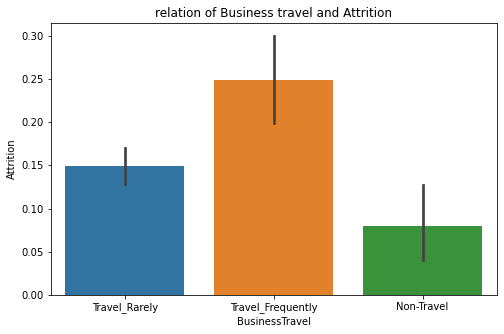

In [403]:
plt.figure(figsize=(8,5))
sns.barplot(x='BusinessTravel',y='Attrition',data=df).set_title('relation of Business travel and Attrition')
plt.show()

- The Employees who have travel frequently do Attrition more rather than Rarely traveller employees and Non traveller employees. 

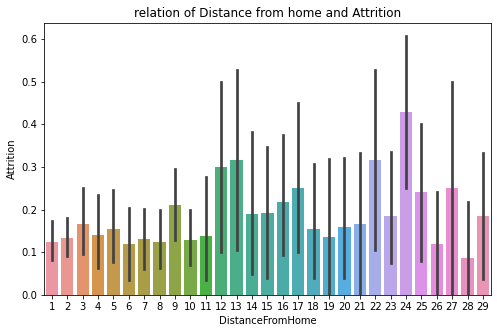

In [404]:
plt.figure(figsize=(8,5))
sns.barplot(x='DistanceFromHome',y='Attrition',data=df).set_title('relation of Distance from home and Attrition')
plt.show()

- There is somewhat mixed relation between Distance from home with Attrition. 

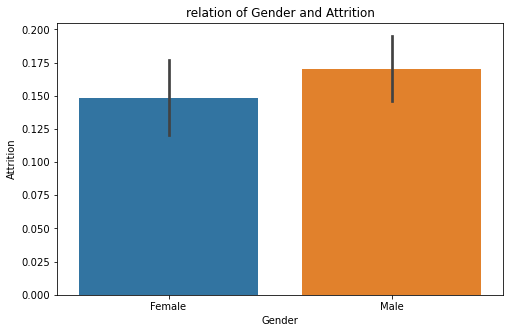

In [405]:
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='Attrition',data=df).set_title('relation of Gender and Attrition')
plt.show()

- Male employees are little more likely to do Attrition than Female employees.

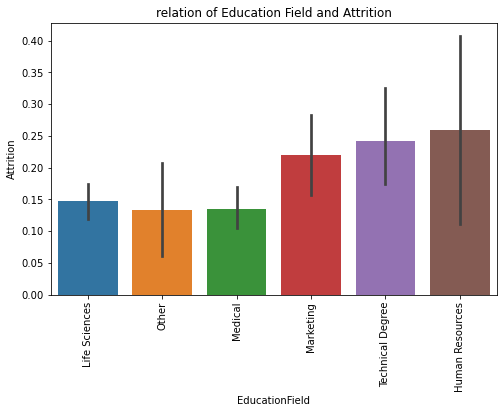

In [406]:
plt.figure(figsize=(8,5))
sns.barplot(x='EducationField',y='Attrition',data=df).set_title('relation of Education Field and Attrition')
plt.xticks(rotation=90)
plt.show()

- Human Resources and Technical Degree Employees are more likely do attrition than rest of the other employees from other backgrounds.

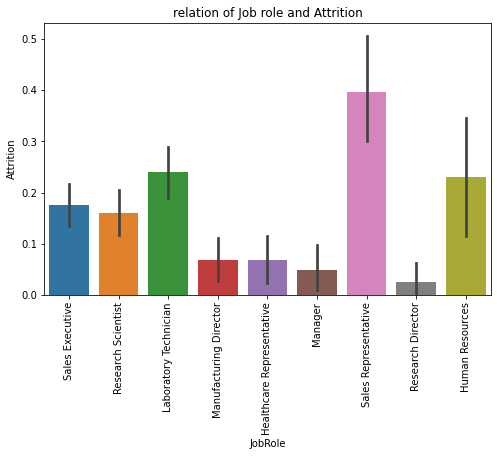

In [407]:
plt.figure(figsize=(8,5))
sns.barplot(x='JobRole',y='Attrition',data=df).set_title('relation of Job role and Attrition')
plt.xticks(rotation=90)
plt.show()

- Sales Representatives are more likely to change or quit the job than other employees with other jobrole .

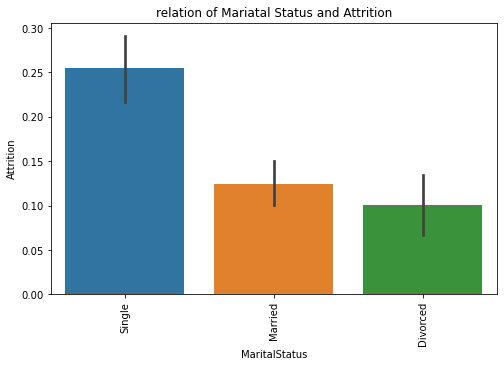

In [408]:
plt.figure(figsize=(8,5))
sns.barplot(x='MaritalStatus',y='Attrition',data=df).set_title('relation of Mariatal Status and Attrition')
plt.xticks(rotation=90)
plt.show()

- Single people are more likely to leave a job than married or divorced people.

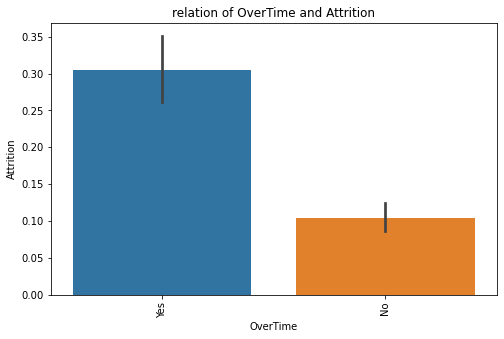

In [409]:
plt.figure(figsize=(8,5))
sns.barplot(x='OverTime',y='Attrition',data=df).set_title('relation of OverTime and Attrition')
plt.xticks(rotation=90)
plt.show()

- Employees who do frequent overtimes are more likely to leave the company.

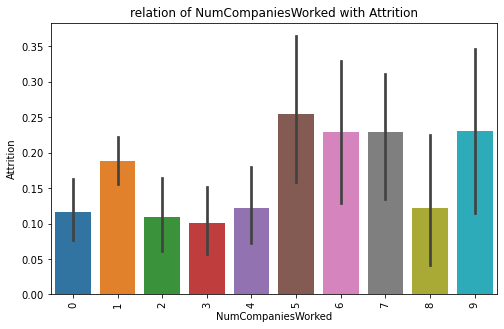

In [410]:
plt.figure(figsize=(8,5))
sns.barplot(x='NumCompaniesWorked',y='Attrition',data=df).set_title('relation of NumCompaniesWorked with Attrition')
plt.xticks(rotation=90)
plt.show()

- People who have worked for more companies are more likely to leave the current company as well.

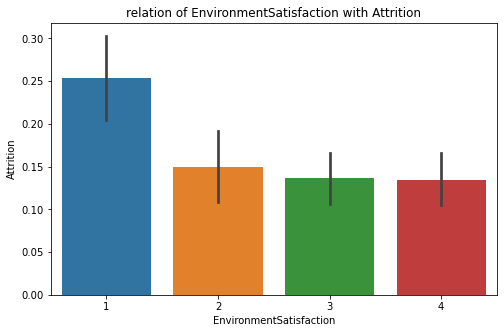

In [411]:
plt.figure(figsize=(8,5))
sns.barplot(x='EnvironmentSatisfaction',y='Attrition',data=df).set_title('relation of EnvironmentSatisfaction with Attrition')
plt.show()

- People who have least Environment Satisfaction (category 1) more likely to leave the job.

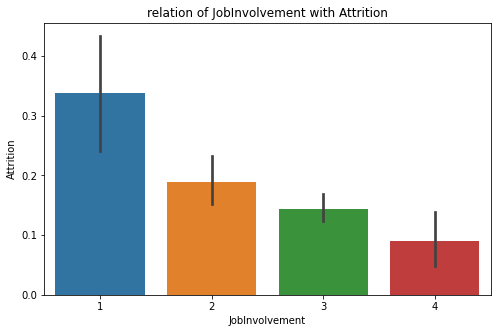

In [412]:
plt.figure(figsize=(8,5))
sns.barplot(x='JobInvolvement',y='Attrition',data=df).set_title('relation of JobInvolvement with Attrition')
plt.show()

- People who have least Job Involvement (category 1) more likely to leave the company.

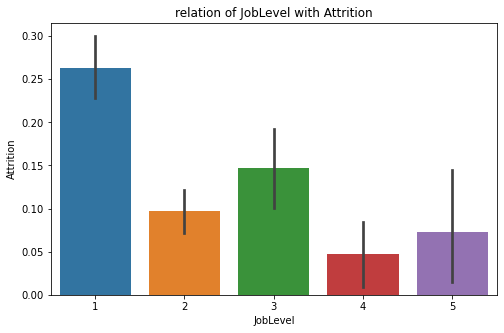

In [413]:
plt.figure(figsize=(8,5))
sns.barplot(x='JobLevel',y='Attrition',data=df).set_title('relation of JobLevel with Attrition')
plt.show()

- People who have least Job level (category 1) more likely to leave the company.

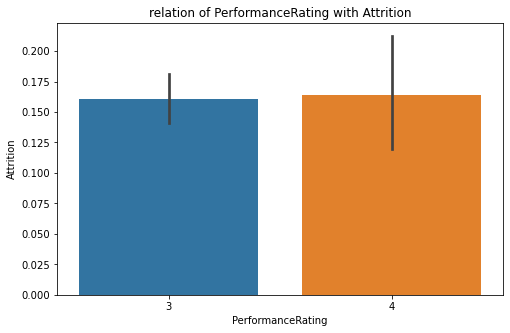

In [414]:
plt.figure(figsize=(8,5))
sns.barplot(x='PerformanceRating',y='Attrition',data=df).set_title('relation of PerformanceRating with Attrition')
plt.show()

- People maybe do not leave job for Performance rating.

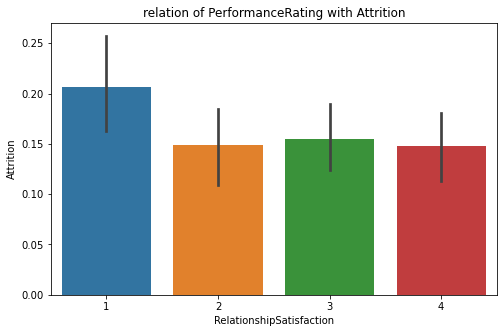

In [415]:
plt.figure(figsize=(8,5))
sns.barplot(x='RelationshipSatisfaction',y='Attrition',data=df).set_title('relation of PerformanceRating with Attrition')
plt.show()

- People who have least Relationship Satisfaction (category 1) more likely to leave the company.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Attrition'>

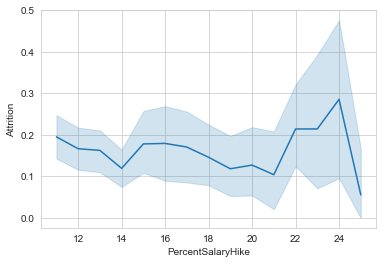

In [416]:
sns.set_style('whitegrid')
sns.lineplot(x='PercentSalaryHike',y='Attrition',data=df)

- People with 24% Percent Salary Hike is more likely to leave the Company.

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

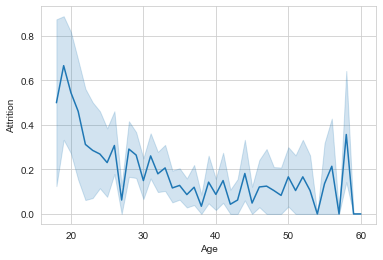

In [417]:
sns.set_style('whitegrid')
sns.lineplot(x='Age',y='Attrition',data=df)

- In early ages like in 20s employees are more likely leave the company than rest of the age groups. 

#### Multivariate Analysis:

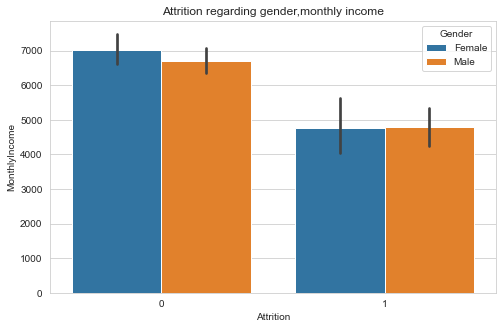

In [418]:
plt.figure(figsize=(8,5))
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df).set_title('Attrition regarding gender,monthly income')
plt.show()

- Male and Female both the employees who get more salary are more likely to stay in the company than people with less salary.

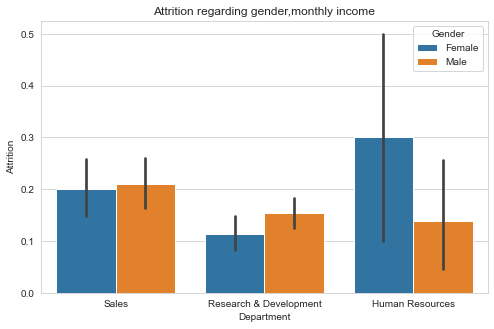

In [419]:
plt.figure(figsize=(8,5))
sns.barplot(x='Department',y='Attrition',hue='Gender',data=df).set_title('Attrition regarding gender,monthly income')
plt.show()

- Female employees of Human Resources Department are more likely to leave the company than other employees of other departments and than male employees of same department. 

Let's drop those columns which have no relation with prediction of Attrition:
We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique value. This features aren't useful for us, So we are going to drop those columns.

In [9]:
# Drop Alert
drop_columns=['EmployeeCount','StandardHours','Over18']
df=df.drop(columns=drop_columns,axis=1)

Let's Check the correlations of feature vs feature and feature vs target:

In [423]:
corr=df.corr()
corr.shape

(25, 25)

####  Heat map (Correlation Matrix):

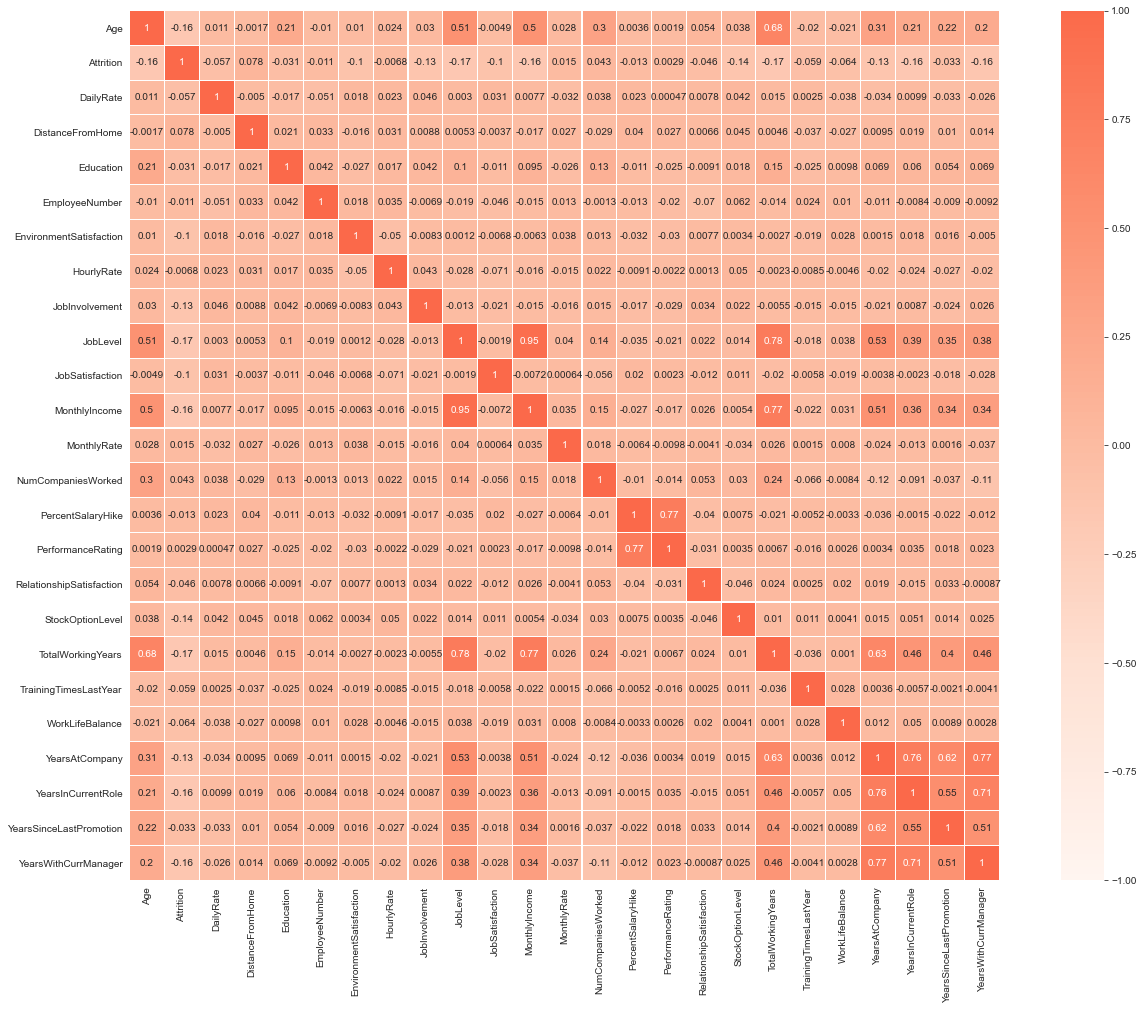

In [424]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- Least correlation between features important for Classification problem. 
- Monthly Income is highly correlated with Job Level.
-  Age is positively correlated with total working years.
- Years in current role is correlated with years at company.
- Years at company is correlated with years with current manager.

#### Data cleaning:


#### Encoding:
Let's encode the nominal data first before skewness removal. For that we are using Ordinal Encoder.

In [10]:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2


#### Skewness Removal :
We are going to use z-score to remove the skewness from the features.

In [11]:
z_score = zscore(df[['Age','DistanceFromHome','MonthlyIncome','JobLevel','PercentSalaryHike','NumCompaniesWorked',
                'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                'YearsWithCurrManager']])     
abs_z_score=np.abs(z_score)#converting data into standard normal distribution

filtering_entry=(abs_z_score<3.5).all(axis=1)

df=df[filtering_entry]
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,...,1424.000000,1424.000000,1424.000000,1424.000000,1424.00000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,36.544242,0.161517,1.606742,804.835674,1.260534,9.167837,2.900281,2.250000,1025.311096,2.722612,...,3.153792,2.702247,0.794242,10.726826,2.79986,2.758427,6.399579,4.021770,1.924860,3.920646
std,8.967859,0.368136,0.665258,403.129810,0.527755,8.075665,1.023216,1.333655,603.387977,1.091535,...,0.360876,1.082588,0.856833,7.179005,1.28835,0.706808,5.052614,3.413866,2.754535,3.350463
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,467.750000,1.000000,2.000000,2.000000,1.000000,487.750000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.00000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,2.000000,805.000000,1.000000,7.000000,3.000000,2.000000,1018.500000,3.000000,...,3.000000,3.000000,1.000000,9.000000,3.00000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,0.000000,2.000000,1157.250000,2.000000,14.000000,4.000000,3.000000,1557.250000,4.000000,...,3.000000,4.000000,1.000000,14.000000,3.00000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,37.000000,6.00000,4.000000,27.000000,16.000000,13.000000,16.000000


- We have used z-score now we need to check the skewness as well.

In [12]:
df.skew()

Age                         0.451617
Attrition                   1.841488
BusinessTravel             -1.435080
DailyRate                  -0.009979
Department                  0.172522
DistanceFromHome            0.960626
Education                  -0.284369
EducationField              0.543352
EmployeeNumber              0.021299
EnvironmentSatisfaction    -0.320197
Gender                     -0.407483
HourlyRate                 -0.031517
JobInvolvement             -0.500052
JobLevel                    1.080990
JobRole                    -0.379822
JobSatisfaction            -0.337213
MaritalStatus              -0.162469
MonthlyIncome               1.472745
MonthlyRate                 0.024508
NumCompaniesWorked          1.021967
OverTime                    0.964453
PercentSalaryHike           0.801598
PerformanceRating           1.921406
RelationshipSatisfaction   -0.289899
StockOptionLevel            0.971353
TotalWorkingYears           1.095491
TrainingTimesLastYear       0.576087
W

- As we can see there is still skewness present in the data. Now we are going to use power transformer to remove the skewness from feature. And for that first we will take those features with skewed data into a variable. Then we will power transform it.

In [13]:
features=['BusinessTravel','DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','OverTime',
          'PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
         'YearsSinceLastPromotion','YearsSinceLastPromotion','YearsWithCurrManager']

In [14]:
scaler=PowerTransformer(method='yeo-johnson')   

In [15]:
df[features]=scaler.fit_transform(df[features].values)

In [16]:
df[features]

,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsSinceLastPromotion,YearsWithCurrManager
0,0.636898,-1.491865,0.298438,0.340903,1.617678,1.591697,-1.490682,-0.415778,-1.082993,-0.205187,0.190269,0.254231,-1.080986,-1.080986,0.543827
1,-1.389274,0.244166,0.298438,0.102755,-0.573135,-0.628260,1.684435,2.356076,0.552215,0.104135,0.875964,0.951264,0.155237,0.155237,0.976889
2,0.636898,-1.030238,-1.156756,-1.439133,1.267058,1.591697,0.192025,-0.415778,-1.082993,-0.377559,-2.174586,-1.582420,-1.080986,-1.080986,-1.537455
3,-1.389274,-0.699877,-1.156756,-0.836619,-0.573135,1.591697,-1.490682,-0.415778,-1.082993,-0.205187,0.564274,0.951264,0.979110,0.979110,-1.537455
4,0.636898,-1.030238,-1.156756,-0.533272,1.762895,-0.628260,-0.954941,-0.415778,0.552215,-0.565155,-0.947160,-0.413265,0.677157,0.677157,-0.376766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-1.389274,1.411700,0.298438,-1.056718,0.788133,-0.628260,0.712793,-0.415778,0.552215,0.954609,-0.030480,-0.413265,-1.080986,-1.080986,-0.014528
1466,0.636898,-0.050437,1.076944,1.070069,0.788133,-0.628260,0.192025,-0.415778,0.552215,-0.045299,0.386772,0.951264,0.155237,0.155237,0.976889
1467,0.636898,-0.441998,0.298438,0.377797,-0.573135,1.591697,1.280150,2.356076,0.552215,-0.565155,0.190269,-0.413265,-1.080986,-1.080986,-0.014528
1468,-1.389274,-1.030238,0.298438,0.179341,0.039727,-0.628260,-0.130587,-0.415778,-1.082993,0.954609,0.726446,0.744552,-1.080986,-1.080986,1.163666


- As we can see the data is looking good than before. Now let's check the skewness one last time before model train.

In [17]:
df.skew()

Age                         0.451617
Attrition                   1.841488
BusinessTravel             -0.965891
DailyRate                  -0.009979
Department                  0.172522
DistanceFromHome           -0.008593
Education                  -0.284369
EducationField              0.543352
EmployeeNumber              0.021299
EnvironmentSatisfaction    -0.320197
Gender                     -0.407483
HourlyRate                 -0.031517
JobInvolvement             -0.500052
JobLevel                    0.106095
JobRole                    -0.379822
JobSatisfaction            -0.337213
MaritalStatus              -0.162469
MonthlyIncome               0.030103
MonthlyRate                 0.024508
NumCompaniesWorked          0.014083
OverTime                    0.964453
PercentSalaryHike           0.112690
PerformanceRating           1.921406
RelationshipSatisfaction   -0.289899
StockOptionLevel            0.091401
TotalWorkingYears          -0.009010
TrainingTimesLastYear       0.576087
W

- As we can see most of the skewed data is now looking good. It's time to divide the dataset into feature and target.

In [18]:
y=df['Attrition']
x=df.drop(columns=['Attrition'])

- After separation the target with features we are going to balance the target before model creation.

In [19]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [21]:
y.value_counts()

1    1194
0    1194
Name: Attrition, dtype: int64

- We have balanced the target now it's time to scale the data.

#### Standardization:

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

##### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split) to gauge how well the classifier is working.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

#### Model Creation:
Now let's see the Accuracy scores according to five models we have used below. we are using models like,
1. Logistic Regression,
2. Decision Tree Classifier,
3. Random Forest Classifier,
4. K-Nearest Neighbors Classifier,
5. Gradient Boosting Classifier​.

#### 1. Logistic Regression:

In [24]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")
      


=======================Train Result===========================
Accuracy score:85.71%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.853039    0.861174  0.857063     0.857106      0.857109
recall       0.862570    0.851562  0.857063     0.857066      0.857063
f1-score     0.857778    0.856341  0.857063     0.857059      0.857059
support    895.000000  896.000000  0.857063  1791.000000   1791.000000
________________________________________________________________
 Confusion Matrix:
[[772 123]
 [133 763]]



In [25]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")      
      


=======================Test Result of LR ===========================
Accuracy score:86.43%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.878472    0.851133  0.864322    0.864802      0.864825
recall       0.846154    0.882550  0.864322    0.864352      0.864322
f1-score     0.862010    0.866557  0.864322    0.864284      0.864280
support    299.000000  298.000000  0.864322  597.000000    597.000000
________________________________________________________________
 Confusion Matrix:
[[253  46]
 [ 35 263]]



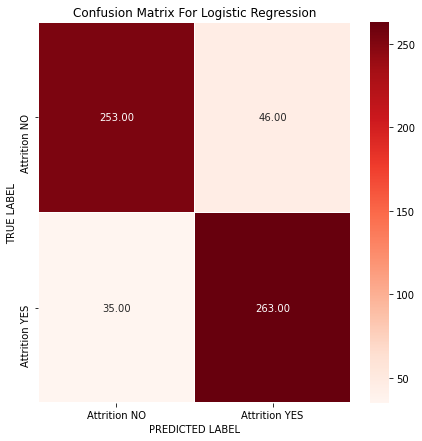

In [26]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['Attrition NO','Attrition YES']
y_axis_labels=['Attrition NO','Attrition YES']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [27]:
#checking ROC_AUC Score of Logistic Regression:

roc_auc_score(y_test,lr.predict(x_test))

0.8643520908621579

#### 2. Decision Tree Classifier :

In [28]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    895.0  896.0       1.0     1791.0        1791.0
________________________________________________________________
 Confusion Matrix:
[[895   0]
 [  0 896]]



In [29]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")      
      


=======================Test Result of dt_clf===========================
Accuracy score:86.26%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.855738    0.869863  0.862647    0.862800      0.862789
recall       0.872910    0.852349  0.862647    0.862629      0.862647
f1-score     0.864238    0.861017  0.862647    0.862628      0.862630
support    299.000000  298.000000  0.862647  597.000000    597.000000
________________________________________________________________
 Confusion Matrix:
[[261  38]
 [ 44 254]]



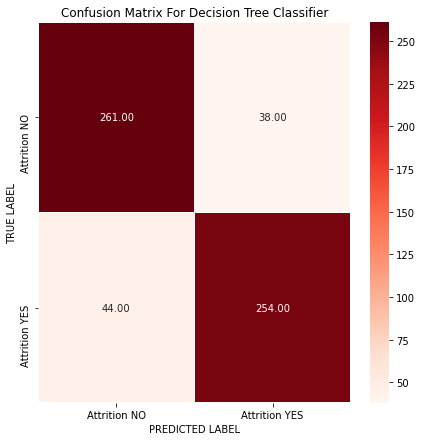

In [30]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['Attrition NO','Attrition YES']
y_axis_labels=['Attrition NO','Attrition YES']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [31]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.8626293461426231

#### 3. Random Forest Classifier :

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    895.0  896.0       1.0     1791.0        1791.0
________________________________________________________________
 Confusion Matrix:
[[895   0]
 [  0 896]]



In [33]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")     


=======================Test Result of RF_clf===========================
Accuracy score:92.96%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.892966    0.974074  0.929648    0.933520      0.933452
recall       0.976589    0.882550  0.929648    0.929569      0.929648
f1-score     0.932907    0.926056  0.929648    0.929482      0.929488
support    299.000000  298.000000  0.929648  597.000000    597.000000
________________________________________________________________
 Confusion Matrix:
[[292   7]
 [ 35 263]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

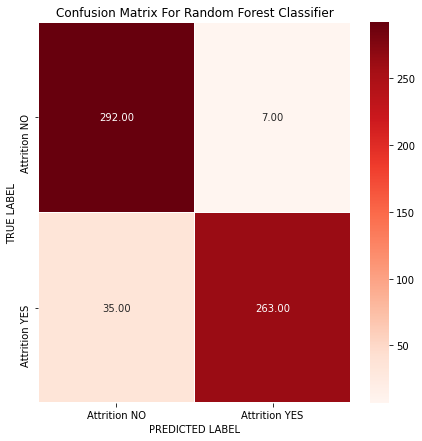

In [34]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['Attrition NO','Attrition YES']
y_axis_labels=['Attrition NO','Attrition YES']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [35]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

0.9295694821665058

#### 4. K-Neighbors Classifier :

In [36]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:86.26%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.995420    0.786092  0.862647     0.890756      0.890697
recall       0.728492    0.996652  0.862647     0.862572      0.862647
f1-score     0.841290    0.878937  0.862647     0.860114      0.860124
support    895.000000  896.000000  0.862647  1791.000000   1791.000000
________________________________________________________________
 Confusion Matrix:
[[652 243]
 [  3 893]]



In [37]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:82.08%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.980000    0.740554  0.820771    0.860277      0.860478
recall       0.655518    0.986577  0.820771    0.821048      0.820771
f1-score     0.785571    0.846043  0.820771    0.815807      0.815757
support    299.000000  298.000000  0.820771  597.000000    597.000000
________________________________________________________________
 Confusion Matrix:
[[196 103]
 [  4 294]]



Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

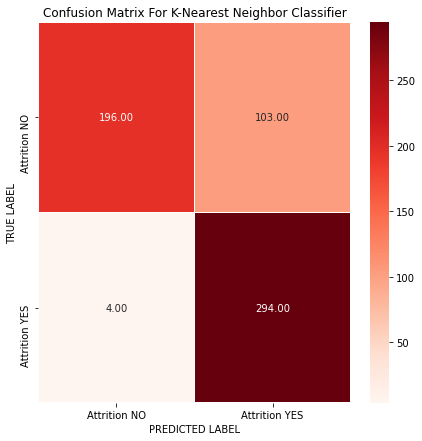

In [38]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['Attrition NO','Attrition YES']
y_axis_labels=['Attrition NO','Attrition YES']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [39]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:

roc_auc_score(y_test,kn.predict(x_test))

0.8210477879284416

#### 5. Gradient Boosting Classifier:

In [40]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:97.15%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.953763    0.990708  0.971524     0.972236      0.972246
recall       0.991061    0.952009  0.971524     0.971535      0.971524
f1-score     0.972055    0.970973  0.971524     0.971514      0.971514
support    895.000000  896.000000  0.971524  1791.000000   1791.000000
________________________________________________________________
 Confusion Matrix:
[[887   8]
 [ 43 853]]



In [41]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:93.13%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.898148    0.970696  0.931323    0.934422      0.934361
recall       0.973244    0.889262  0.931323    0.931253      0.931323
f1-score     0.934189    0.928196  0.931323    0.931193      0.931198
support    299.000000  298.000000  0.931323  597.000000    597.000000
________________________________________________________________
 Confusion Matrix:
[[291   8]
 [ 33 265]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

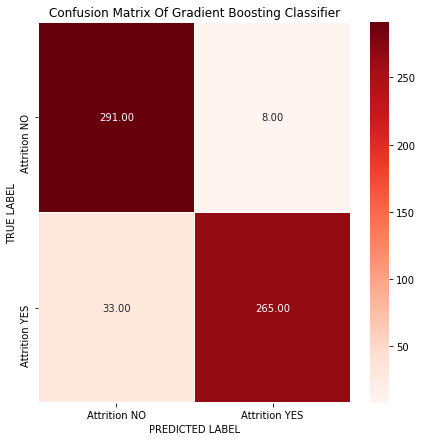

In [45]:
cm = confusion_matrix(y_test,pred)

x_axis_labels=['Attrition NO','Attrition YES']
y_axis_labels=['Attrition NO','Attrition YES']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [46]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.9312529460618169

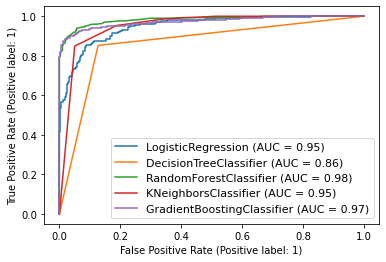

In [48]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Observation: 
We have seen that Gradient Boosting Classifier has given the best accuracy regarding Attrition.


####    Cross validation :

   Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.



In [49]:
#Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:75.21%


In [50]:
#Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:69.01%


In [51]:
#Checking Cross Validation
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:85.72%


In [52]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:63.90%


In [53]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:73.15%


Now let's check the difference between Accuracy Score and Cross Validation Score to select the best model from the 5 models:

- Diffrence betwwwn Accuracy score and Cross Validation Score of 5 different models :
- LR = 86.43%-75.21% = 11.22 
- DT = 86.26%-69.01% = 17.25 
- Rf = 92.96%-85.72% = 7.24 
- KNN = 82.08%-63.90% = 18.18
- Gbdt_clf = 93.13%-73.15% = 19.98

So, as the accuracy score of random forest classifier is almost 93% and  as the difference of Accuracy Score and CV of Random Forest Classifier is least, it's the best Model. Let's do Hyperparameter Tuning of RFC.

#### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of Random Forest Classifier. After getting the best parameters we can use those with the model to obtain best accuracy.


In [54]:
rf = RandomForestClassifier()
params={'n_estimators':[12,13,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,13,15,17],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 17}
con_mat=>  
 [[285  14]
 [ 38 260]]
Accuracy of rf After Hyperparameter Tuning==>  91.28978224455612


#### Observation:

After tuning with best parameters of Random forest classifier, it does not increase the accuracy (91.28%).
Let's check the classification report for that.

In [55]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       299
           1       0.95      0.87      0.91       298

    accuracy                           0.91       597
   macro avg       0.92      0.91      0.91       597
weighted avg       0.92      0.91      0.91       597



- classification report is showing  the Precision,recall,f1-score,accuracy together.

Let's check the AUC ROC Curve:

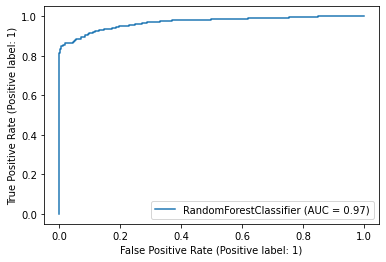

In [56]:
disp = plot_roc_curve(rfc,x_test,y_test)

- As we can conclude, RFC is the best model as the density of area under curve is most. 

In [315]:
# model prediction using RF
x_predict = list(rfc.predict(x_test))
rfc_hr = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rfc_hr))

      predicted_values  orignal_values
1788                 1               1
1744                 1               1
1401                 1               1
1208                 0               0
461                  0               1
...                ...             ...
1526                 1               1
785                  1               0
1210                 0               0
429                  0               0
1551                 1               1

[564 rows x 2 columns]


In [316]:
#import joblib
import joblib

joblib.dump(rfc,'rfc_hr_file.obj')

# SAVING THE MODEL

['rfc_hr_file.obj']

In [317]:
rf_from_joblib=joblib.load('rfc_hr_file.obj')
rf_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

#### Conclusion:

There should be a state of symbiotic relation between employees of an organization with the organization itself as the employees and the workers are the backbone of that company. Both the parties should do their best for each other to achieve the best. An employee's growth is so much related with companies growth.
Companies often train their employees for upgradation, that helps the workers as well as the companies and it costs much. But in long run sometimes companies face Attrition.
In this given dataset we analyzed all the given features than will cause attrition minutely.
As we can see Single people are more likely to switch the job maybe for better opportunity. People who got good salary more likely to stay in the company. Each of the feature is important in this dataset as all are more or less related to Attrition. Like female employees are more likely to stay in company than male employees.
After analysis we have made 5 models and out of which Random Forest Regressor has given the best Accuracy of 92%.
For that we have saved the Random forest classifier model for Understanding the Attrition in HR.